# 线性平滑滤波

In [65]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [66]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [67]:
def average_kernel(size=(3,3)):
    # 平滑滤波
    h = np.ones(shape = size) / np.prod((np.array(list(size))).tolist())
    return h

In [68]:
src = cv2.cvtColor(cv2.imread('../../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [84]:
rows,cols = gray.shape
noise = noise_gaussian(rows,cols,a=0,b=0.1)
gray_noise = gray + (noise * 255).astype(np.uint8)
src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [70]:
kernel_3x3 = average_kernel()
dst_3x3 = cv2.filter2D(src_noise,-1,kernel_3x3)

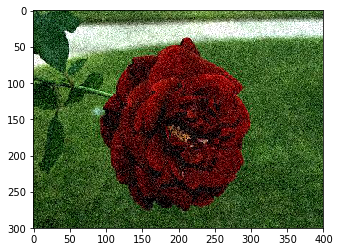

In [71]:
plt.imshow(src_noise)

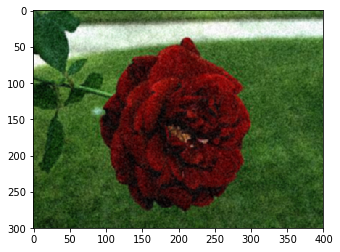

In [72]:
plt.imshow(dst_3x3)

In [73]:
kernel_5x5 = average_kernel((5,5))
dst_5x5 = cv2.filter2D(src_noise,-1,kernel_5x5)

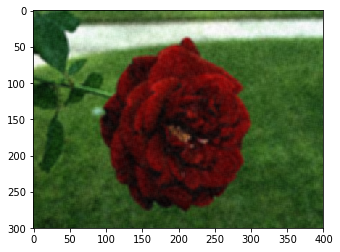

In [74]:
plt.imshow(dst_5x5)

In [75]:
# import math
# def disk_filter_kernel(p2):
#     rad = p2
#     crad = np.ceil(rad - 0.5)
#     [x,y] = np.meshgrid(np.arange(-crad,crad),np.arange(-crad,crad))
#     maxxy = max(np.max(np.abs(x)),np.max(np.abs(y)))
#     minxy = min(np.min(np.abs(x)),np.min(np.abs(y)))
    
#     m1 = (rad ** 2 <  (maxxy+0.5)**2 + (minxy-0.5)**2) *(minxy-0.5) +(rad**2 >= (maxxy+0.5)**2 + (minxy-0.5)**2)* math.sqrt(rad**2 - (maxxy + 0.5)**2)
#     m2 = (rad **2 >  (maxxy-0.5) **2 + (minxy+0.5)**2)*(minxy+0.5) + (rad**2 <= (maxxy-0.5)**2 + (minxy+0.5)**2)* math.sqrt(rad**2 - (maxxy - 0.5)**2)
#     sgrid = (rad**2*(0.5*(math.asin(m2/rad) - math.asin(m1/rad)) + 0.25*(sin(2*math.asin(m2/rad)) - math.sin(2*math.asin(m1/rad)))) - (maxxy-0.5)*(m2-m1) + (m1-minxy+0.5))*((((rad**2 < (maxxy+0.5)**2 + (minxy+0.5)**2) & (rad**2 > (maxxy-0.5)**2 + (minxy-0.5)**2)) | ((minxy==0)&(maxxy-0.5 < rad)&(maxxy+0.5>=rad))))
#     sgrid = sgrid + ((maxxy+0.5)**2 + (minxy+0.5)**2 < rad**2)
#     sgrid[int(crad+1),int(crad+1)] = min(pi*(rad**2),np.pi/2)
#     if ((crad>0) and (rad > crad-0.5) and (rad**2 < (crad-0.5)**2+0.25)):
#         m1  = math.sqrt(rad**2 - (crad - 0.5)**2)
#         m1n = m1/rad
#         sg0 = 2*(rad**2*(0.5*math.asin(m1n) + 0.25*math.sin(2*math.asin(m1n)))-m1*(crad-0.5))
#         sgrid[int(2*crad+1),int(crad+1)] = sg0;
#         sgrid[int(crad+1),int(2*crad+1)] = sg0;
#         sgrid[int(crad+1),int(1)]        = sg0;
#         sgrid[int(1),int(crad+1)]        = sg0;
#         sgrid[int(2*crad),int(crad+1)]   = sgrid[int(2*crad),int(crad+1)] - sg0;
#         sgrid[int(crad+1),int(2*crad)]   = sgrid[int(crad+1),int(2*crad)] - sg0;
#         sgrid[int(crad+1),int(2)]        = sgrid[int(crad+1),int(2)]      - sg0;
#         sgrid[int(2),int(crad+1)]        = sgrid[int(2),int(crad+1)]      - sg0;
        
#     sgrid[int(crad+1),int(crad+1)] = min(sgrid[int(crad+1),int(crad+1)],1);
#     h = sgrid/np.sum(sgrid)
#     return h   

In [76]:
# disk_filter_kernel(5)

In [77]:
 def disk_filter_kernel(radius):
    kernel = np.zeros((int(2*radius+1), int(2*radius+1)))
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = (x**2 + y**2 <= radius**2)
    kernel[mask] = 1
    return kernel

In [78]:
disk_kernel = disk_filter_kernel(5)

In [79]:
print(disk_kernel)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [80]:
def disk_filter(img,radis):
    ksize = int(2*radis)
    if ksize % 2 == 0:
        ksize = ksize + 1
    kernel = disk_filter_kernel(radis)
    dst = cv2.filter2D(img,-1,radis)
    dst = cv2.medianBlur(dst,ksize)
    return dst

In [81]:
dst_disk = disk_filter(src_noise,1.5)

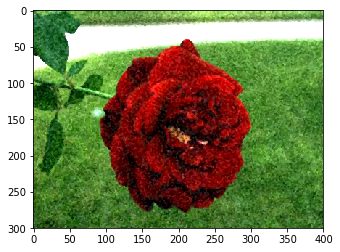

In [82]:
plt.imshow(dst_disk)

## 使用SKImage实现Disk Filter

In [92]:
import skimage
import skimage.data
import skimage.morphology
import skimage.filters

# load example image
original = skimage.data.camera()

# create disk-like filter footprint with given radius
radius = 3
circle = skimage.morphology.disk(radius)

# apply median filter with given footprint = structuring element = selem
fr = skimage.filters.median(src_noise[:,:,0], selem = circle)
fg = skimage.filters.median(src_noise[:,:,1], selem = circle)
fb = skimage.filters.median(src_noise[:,:,2], selem = circle)

In [93]:
print(circle)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


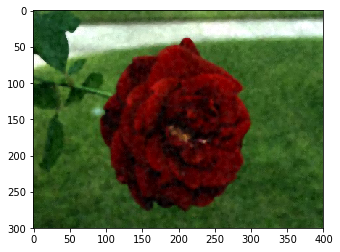

In [94]:
plt.imshow(cv2.merge([fr,fg,fb]))